**Step 1:** Load the dataset

In [1]:
import pandas as pd

seeds_df = pd.read_csv('data/seeds-less-rows.csv')
seeds_df.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


In [2]:
pd.unique(seeds_df['grain_variety'])

array(['Kama wheat', 'Rosa wheat', 'Canadian wheat'], dtype=object)

In [3]:
seeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   42 non-null     float64
 1   perimeter              42 non-null     float64
 2   compactness            42 non-null     float64
 3   length                 42 non-null     float64
 4   width                  42 non-null     float64
 5   asymmetry_coefficient  42 non-null     float64
 6   groove_length          42 non-null     float64
 7   grain_variety          42 non-null     object 
dtypes: float64(7), object(1)
memory usage: 2.8+ KB


In [4]:
# remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# extract the measurements as a NumPy array
samples = seeds_df.values
samples.shape

(42, 7)

**Step 2:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [6]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [7]:
mergings = linkage(samples, method='complete')

## Linkage Methods of Clustering

<img src='linkage.png' width=400>

<img src='linkage3.png' width=400>

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

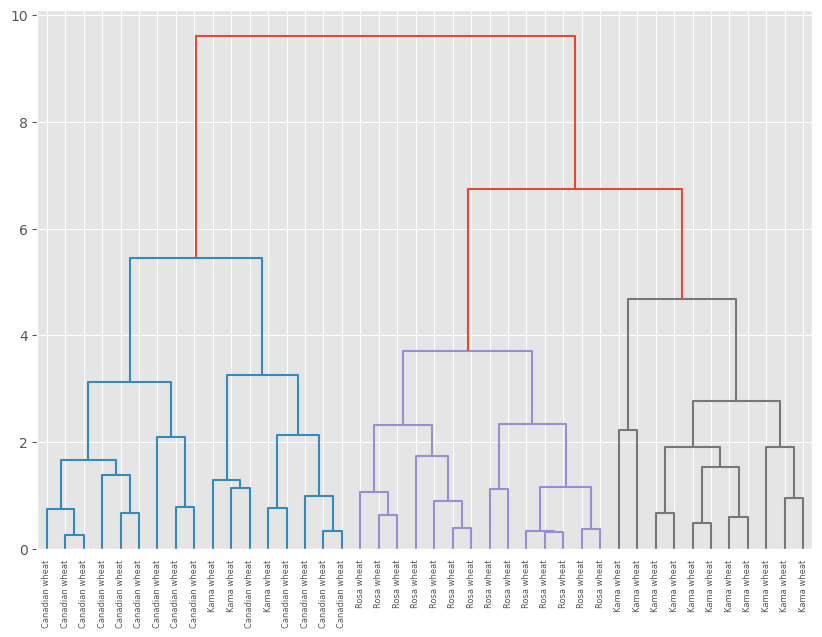

In [8]:
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [9]:
# Fitting Hierarchical Clustering to the data
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(samples)

/Users/jidhumohan/opt/anaconda3/envs/py11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [10]:
y_hc.shape

(42,)

In [11]:
y_hc

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

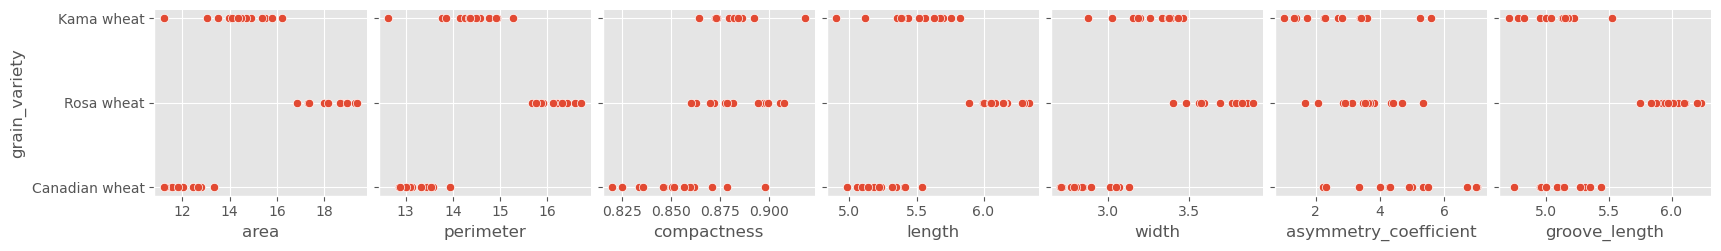

In [13]:
import seaborn as sns

seeds_df = pd.read_csv('data/seeds-less-rows.csv')
sns.pairplot(seeds_df.iloc[:,:],x_vars=seeds_df.columns[:-1], y_vars='grain_variety')
plt.show()